In [ ]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 3: Preprocess the dataset
# Reshape the data to flatten the 28x28 images into 1D vectors (28*28 = 784)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# Normalize the data to values between 0 and 1
x_train /= 255.0
x_test /= 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Step 4: Define the neural network architecture
model = Sequential([
    # Flatten the input data (28x28 pixels)
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    # First Dense Layer with ReLU activation
    Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    Dropout(0.2),

    # Output layer with softmax activation for multiclass classification
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 5: Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8120 - loss: 0.6607 - val_accuracy: 0.9454 - val_loss: 0.1858
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9431 - loss: 0.2003 - val_accuracy: 0.9612 - val_loss: 0.1304
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9591 - loss: 0.1459 - val_accuracy: 0.9674 - val_loss: 0.1090
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9654 - loss: 0.1176 - val_accuracy: 0.9713 - val_loss: 0.0916
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9712 - loss: 0.0963 - val_accuracy: 0.9754 - val_loss: 0.0823
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9744 - loss: 0.0857 - val_accuracy: 0.9757 - val_loss: 0.0783
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9783 - loss: 0.0732 - val_accuracy: 0.9764 - val_loss: 0.0730
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9795 - loss: 0.0658 - val_accuracy: 0.

In [ ]:
# Step 7: Upload an image (using Google Colab uploader)
uploaded = files.upload()

Saving 2.jpg to 2.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted class label: 6


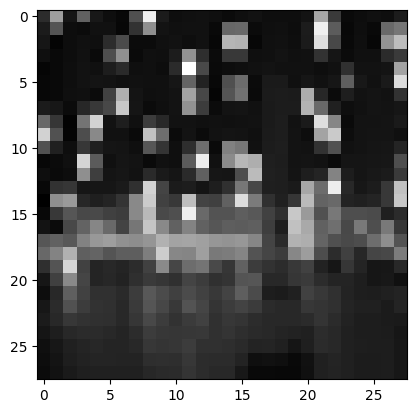

In [ ]:
# Step 8: Load the uploaded image
for fn in uploaded.keys():
    # Open the uploaded image
    img = Image.open(fn)

    # Step 9: Preprocess the image data (convert to grayscale, resize, normalize)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img).astype('float32')  # Convert to numpy array
    img = img.reshape(1, 28, 28, 1)  # Reshape for model input
    img /= 255.0  # Normalize the image data

    # Step 10: Predict the class label using the trained model
    prediction = model.predict(img)

    # Step 11: Print the predicted class label
    predicted_label = np.argmax(prediction)
    print(f"Predicted class label: {predicted_label}")

    # Optionally display the uploaded image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()